<h3>The Sparks Foundation

<h4>Data Science and Business Analytics Internship Task 

<h4> Task 3 : Exploratory Data Analysis - Retail

<H4> By : AARZOO

<H4> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<H4> Importing data set

In [2]:
data = pd.read_csv('C:/Users/admin/Downloads/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<H4> Understanding the data

In [3]:
data.info() 
#This will tell us about the type of data stored in every column and the number of NANs present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [4]:
data[['Profit','Discount','Sales']].describe()
#Descriptive analysis on dataset

,Profit,Discount,Sales
count,9994.000000,9994.000000,9994.000000
mean,28.656896,0.156203,229.858001
std,234.260108,0.206452,623.245101
min,-6599.978000,0.000000,0.444000
25%,1.728750,0.000000,17.280000
50%,8.666500,0.200000,54.490000
75%,29.364000,0.200000,209.940000
max,8399.976000,0.800000,22638.480000


<h4> Treating NAN's

In [5]:
data.isna().sum()        #NO NAN's present.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<H4> All unique values

In [6]:
data.nunique()  
# All the data is from USA

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<h4> Columns 

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<H4> How columns are inter-related

<AxesSubplot:>

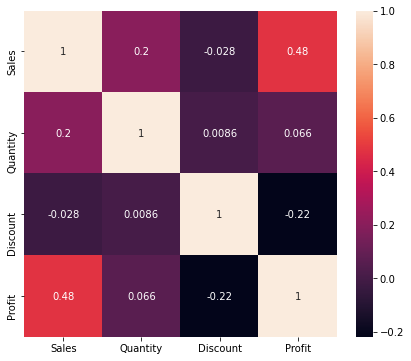

In [8]:
plt.figure(figsize = (7,6))
sns.heatmap(data[['Sales','Quantity','Discount','Profit']].corr(),
           annot= True)

# <H3>Understanding the Columns

<h4>1 : Category

In [9]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
data.groupby('Category')['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

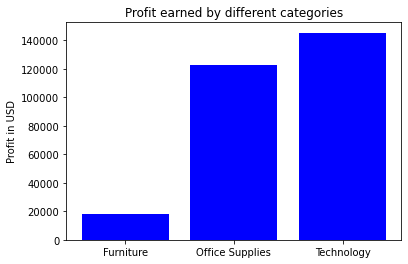

In [40]:

plt.bar(x =data['Category'].unique(),
        height = data.groupby('Category')['Profit'].sum())
plt.ylabel('Profit in USD')
plt.title('Profit earned by different categories')
plt.show()



<h4>2 : Sub-Categories

In [13]:
data['Sub-Category'].nunique()

17

In [14]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head()

Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

In [16]:
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head()

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

<h3> Comparision of sales and profit for each Sub-category


<ipython-input-33-079b7d6997fb>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 936x792 with 0 Axes>

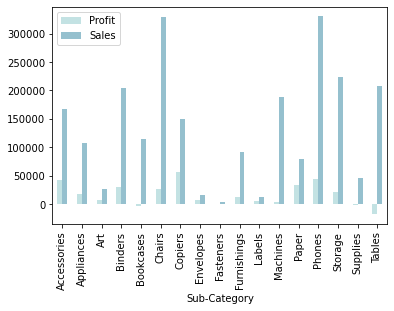

In [33]:
plt.figure(figsize=(13,11))
plt.style.context('classic')

data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()  
plt.legend(['Profit', 'Sales'],loc =2)

plt.show()

<h4>3: Segments

In [18]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
data['Segment'].value_counts().sort_values()

Home Office    1783
Corporate      3020
Consumer       5191
Name: Segment, dtype: int64

In [20]:
segement_profit = data.groupby('Segment')['Profit'].sum()
segement_profit

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

<h3> Profit share of each Segment 

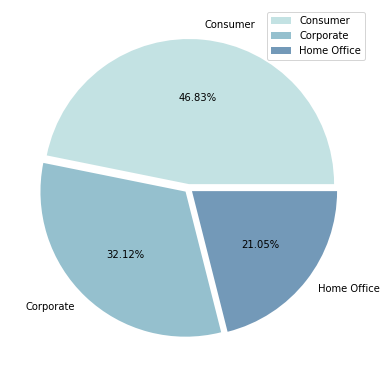

In [21]:
sns.set_palette('ch:start=.2,rot=-.3') 

plt.figure(figsize = (6.5,7))
plt.pie(segement_profit,
        labels = data['Segment'].unique(),
       autopct = '%.2f%%',explode=[.03,.03,.03])
plt.legend()
plt.show()


<H4>4: Cities

In [22]:
city = data.groupby('City')['Profit'].sum()
city.sort_values(ascending = False, inplace= True)
city.head()

#Top 5 cities with maximum profit

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [23]:
city = data.groupby('City')['Profit'].sum()
city.sort_values(ascending = False, inplace= True)
city.tail()

#Top 5 cities with minimum profit or maximum loss

City
Chicago         -6654.5688
Lancaster       -7239.0684
San Antonio     -7299.0502
Houston        -10153.5485
Philadelphia   -13837.7674
Name: Profit, dtype: float64

<H4>5: States

In [24]:
state = pd.DataFrame(data.groupby('State')['Profit'].sum().sort_values())

state= state.reset_index()
state.sort_values(by = 'Profit', inplace = True, ascending = False)
state.head()
#Top 5 states with maximum profit

,State,Profit
48,California,76381.3871
47,New York,74038.5486
46,Washington,33402.6517
45,Michigan,24463.1876
44,Virginia,18597.9504


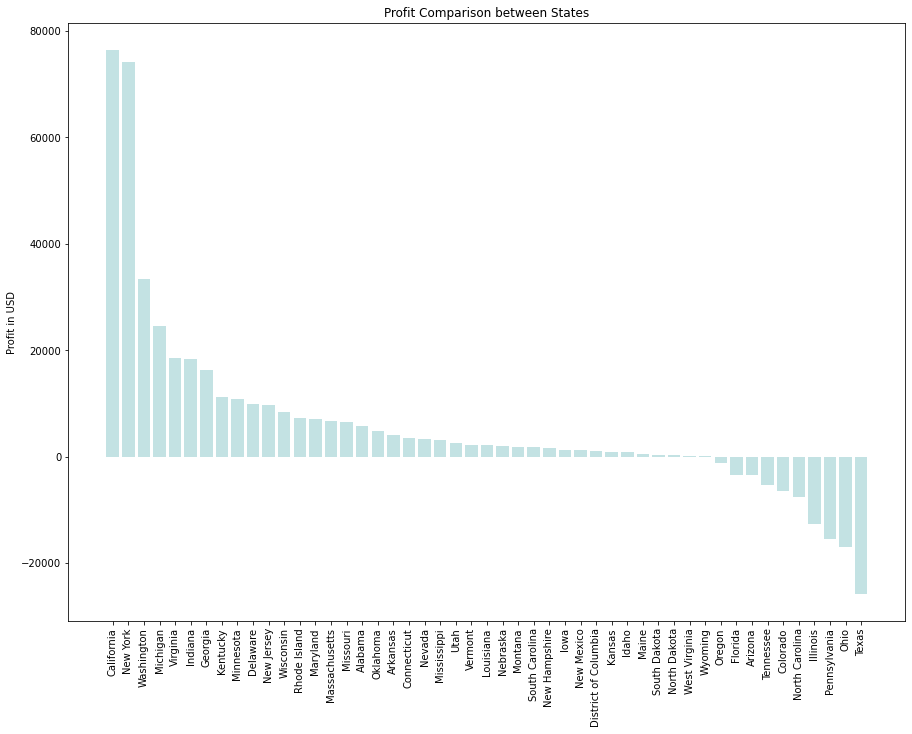

In [37]:
plt.figure(figsize = (15,11))
plt.bar(x =state['State'] , height = state['Profit'])
plt.xticks(rotation= 90)
plt.title('Profit Comparison between States')
plt.ylabel('Profit in USD')
plt.show()

<h4> 6: Shipping-Mode

In [26]:
data.groupby('Ship Mode')['Profit'].sum()

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

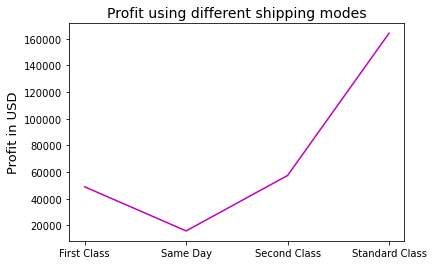

In [27]:
plt.plot(data.groupby('Ship Mode')['Profit'].sum(), color = 'm')
plt.title('Profit using different shipping modes',fontweight = 'light',fontsize =14)
plt.ylabel('Profit in USD', fontsize = 13)
plt.show()

<h6>  Insights that we got from our data are :                               


<h7> 
                              
    
*  Maximum profit is earned by the sales of Technology products                                                                       
*  Sub-categories that causes most profit are Copiers,Phones and Accessories                                                         
*  Consumer segment corresponds to maximum profit                                                                                                
*  Shipping through standard class is more profitable.                                                                                          
*  California earns maximum profit                                                                                                           
*  Texas bears the most loss                                                               
    
    


# Understanding why texas has minimum profit

<H6> Reason 1 : Technology products are sold less

In [28]:
#Creating the texas variable
texas = data[data['State']=='Texas']
texas['Category'].value_counts()

Office Supplies    604
Furniture          202
Technology         179
Name: Category, dtype: int64

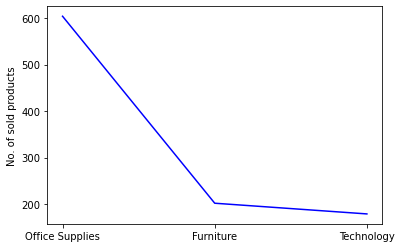

In [29]:
plt.plot(texas['Category'].value_counts(), color = 'blue')
plt.ylabel('No. of sold products')
plt.show()

<h5> Reason 2 : Copiers that causes maximum profit are sold the least

<AxesSubplot:>

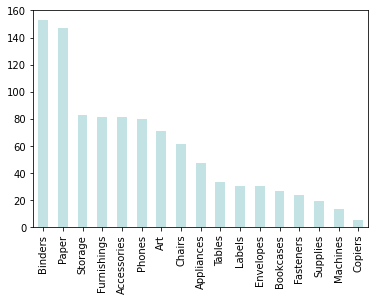

In [30]:
texas['Sub-Category'].value_counts().plot.bar()
